In [1]:
import pandas as pd
import numpy as np

In [39]:
pima = pd.read_csv('pima_indian_diabetes.csv')

In [40]:
pima.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [41]:
pima.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

In [42]:
dib = (sum(pima['Diabetes'])/len(pima['Diabetes'].index))*100

In [43]:
dib

33.16326530612245

In [44]:
df = pima[['Plasma_Glucose','Diastolic_BP','Triceps','Insulin','BMI','Age','No_Times_Pregnant']]

In [45]:
normalized_df=(df-df.mean())/df.std()

In [46]:
pima= pima.drop(['Plasma_Glucose','Diastolic_BP','Triceps','Insulin','BMI','Age','No_Times_Pregnant'], 1)

In [47]:
pima = pd.concat([pima,normalized_df],axis=1)

In [48]:
pima.head()

,Diabetes,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,No_Times_Pregnant
0,0,-1.089653,-0.373178,-0.584363,-0.522175,-0.709514,-0.967063,-0.716511
1,1,0.465719,-2.453828,0.556709,0.100502,1.424909,0.209318,-1.027899
2,1,-1.446093,-1.653578,0.271441,-0.572662,-0.296859,-0.476904,-0.093734
3,1,2.409934,-0.053078,1.507603,3.255961,-0.368007,2.169953,-0.405123
4,1,2.150705,-0.853328,-0.584363,5.805571,-0.424924,2.758143,-0.716511


In [49]:
pima.describe()

,Diabetes,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,No_Times_Pregnant
count,392.000000,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,0.331633,5.540494e-18,-4.299282e-16,9.686129e-17,7.831037e-17,3.188493e-15,5.083802e-17,-1.642677e-17
std,0.471401,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-2.158972e+00,-3.734229e+00,-2.105793e+00,-1.195339e+00,-2.118234e+00,-9.670632e-01,-1.027899e+00
25%,0.000000,-7.656174e-01,-6.932780e-01,-7.745416e-01,-6.673258e-01,-6.668258e-01,-7.709997e-01,-7.165108e-01
50%,0.000000,-1.175457e-01,-5.307782e-02,-1.382677e-02,-2.571162e-01,1.618967e-02,-3.788727e-01,-4.051225e-01
75%,1.000000,6.601404e-01,5.871224e-01,7.468881e-01,2.856226e-01,5.711397e-01,5.034131e-01,5.290424e-01
max,1.000000,2.442338e+00,3.147923e+00,3.219211e+00,5.805571e+00,4.839986e+00,4.914842e+00,4.265702e+00


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = pima.drop(['Diabetes'],axis=1)

# Putting response variable to y
y = pima['Diabetes']

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [55]:
X_train.describe()

,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,No_Times_Pregnant
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,-0.004488,0.025195,-0.012786,0.035704,0.031562,-0.060448,-0.025547
std,1.000324,0.991617,1.009403,1.028585,1.021551,0.968125,0.993112
min,-2.158972,-3.254079,-2.105793,-1.186925,-2.118234,-0.967063,-1.027899
25%,-0.765617,-0.693278,-0.845859,-0.656808,-0.638367,-0.771000,-0.716511
50%,-0.117546,0.026947,-0.013827,-0.248702,0.030419,-0.476904,-0.405123
75%,0.660140,0.747172,0.746888,0.315074,0.603156,0.405381,0.529042
max,2.377531,3.147923,2.933943,5.805571,4.839986,3.150270,4.265702


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)

In [56]:
metrics.accuracy_score( y_test, y_pred)

0.7627118644067796

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[68 12]
 [16 22]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83        80
          1       0.65      0.58      0.61        38

avg / total       0.76      0.76      0.76       118



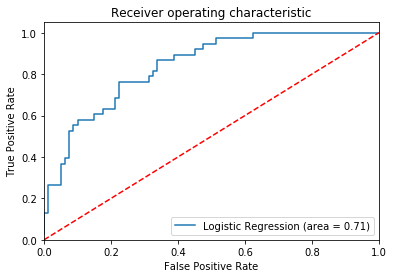

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()